In [1]:
'''
This code produces a bar graph to compare the number of training images in each region
'''
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#import the spreadsheet that has number of training images
four_sheets = []
regions = [ 'Gulf', 'NL 2020', 'NL 2021', 'PA']
xls = pd.ExcelFile('regional_prediction_strategies.xlsx')
current_sheets = pd.read_excel(xls, None)
for key in current_sheets.keys():
    if key in regions:
        four_sheets.append(current_sheets[key])
len(four_sheets)

4

In [3]:
#organize the data into arrays for the bargraph
just_counts = []
for i, sheet in enumerate(four_sheets):
    print(regions[i])
    sheet = sheet.sort_values('region_training_classes_count', ascending=False).reset_index(drop=True)
    two_cols = sheet.loc[:9][['newName', 'region_training_classes_count']]
    just_counts.append(two_cols['region_training_classes_count'].to_numpy())
print(just_counts)

sheet = four_sheets[0].sort_values('all_regions_training_classes_count', ascending=False).reset_index(drop=True)
two_cols = sheet.loc[:9][['newName', 'all_regions_training_classes_count']]
just_counts.append(two_cols['all_regions_training_classes_count'].to_numpy())
print(just_counts)

Gulf
NL 2020
NL 2021
PA
[array([101461.,  23505.,  10297.,   7238.,   4715.,   4428.,   3730.,
         3574.,   3541.,   3461.]), array([5448., 5148., 4552., 3713., 3447., 2845., 2807., 1409., 1025.,
        761.]), array([5448., 5148., 4552., 3713., 3447., 2845., 2807., 1409., 1025.,
        761.]), array([6358., 4507., 4410., 3605., 3481., 2649., 1760., 1525., 1270.,
        981.])]
[array([101461.,  23505.,  10297.,   7238.,   4715.,   4428.,   3730.,
         3574.,   3541.,   3461.]), array([5448., 5148., 4552., 3713., 3447., 2845., 2807., 1409., 1025.,
        761.]), array([5448., 5148., 4552., 3713., 3447., 2845., 2807., 1409., 1025.,
        761.]), array([6358., 4507., 4410., 3605., 3481., 2649., 1760., 1525., 1270.,
        981.]), array([111319,  23505,  11555,  11064,   7685,   7347,   7347,   6992,
         6498,   6288], dtype=int64)]


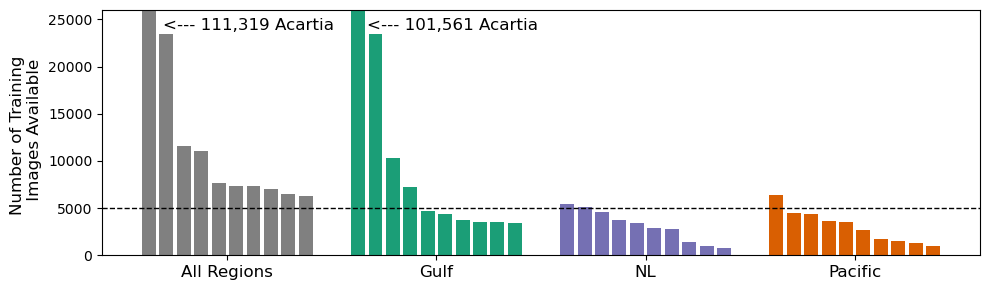

In [19]:
#plot the graphs

regions = ['All Regions', 'Gulf', 'NL', 'PA']
{'Gulf': 'palevioletred', 'PA': 'darkturquoise', 'NL 2020': 'gray', 'NL 2021': 'darkorange'}

n_bars = len(just_counts[0])



# Positions for each bar in a group
x = np.arange(n_bars)

# Define the width of each bar
bar_width = 0.8

# Adjust positions for each list group to add spacing between them
offset = n_bars + 2  # Adding some extra space between clusters
x_list1 = x
x_list2 = x + offset
x_list3 = x + 2 * offset
x_list4 = x + 3 * offset
x_list5 = x + 4 * offset
regionColors = {'Pacific': '#d95f02', 'Gulf':'#1b9e77', 'NL 2020': '#7570b3', 'NL 2021': '#e7298a'}
colors = ['palevioletred', 'darkorange', 'darkturquoise', '#f1c40f', 'gray']  # Blue, red, green, yellow
plt.figure(figsize=((10, 3)))
# Plot each list as a separate group of ten bars
plt.bar(x_list1, just_counts[4], color='gray', width=bar_width, label='All')
plt.bar(x_list2, just_counts[0], color=regionColors['Gulf'], width=bar_width, label='Gulf')
plt.bar(x_list3, just_counts[1], color=regionColors['NL 2020'], width=bar_width, label='NL')
# plt.bar(x_list4, just_counts[2], color=colors[2], width=bar_width, label='List 3')
plt.bar(x_list4, just_counts[3], color=regionColors['Pacific'], width=bar_width, label='PA')
plt.axhline(y=5000, color='black', linestyle='--', linewidth=1,)
# plt.axhline(y=200, color='black', linestyle='--', linewidth=1,)

plt.text(0.8, 23600, '<--- 111,319 Acartia', ha='left', va='bottom', fontsize=12)
plt.text(12.5, 23600, '<--- 101,561 Acartia', ha='left', va='bottom', fontsize=12)

# Adding labels and legend
# plt.xlabel('Regions', fontsize=16)
plt.ylabel('Number of Training \n Images Available', fontsize=12)
# plt.title('Training Images by Region', fontsize=16)
plt.xticks(
    (x_list1.mean(), x_list2.mean(), x_list3.mean(), x_list4.mean()), 
    ['All Regions', 'Gulf', 'NL', 'Pacific'],
    fontsize=12,
)
plt.ylim([0, 26000])
# plt.legend(fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

In [17]:
# show the taxa and sum of training images for each region. NL 2020 and NL 2021 are equal, as they should be.
regions = [ 'Gulf', 'NL 2020', 'NL 2021', 'PA']
for r, region in enumerate(regions):
    print('----------------------', region, '-----------------------')
    df = four_sheets[r]
    df = df[df['region_training_classes_count'].notna()]
    sum = df['region_training_classes_count'].sum()
    print(len(df), sum)
    print(df['newName'].to_numpy())

---------------------- Gulf -----------------------
47 185283.0
['Acartia spp.' 'Calanoida (unid)' 'Copepoda (nauplii)' 'Evadne spp.'
 'Zooplankton (unid)' 'Oithona spp.' 'Hydrozoa (medusa)'
 'Bivalvia (larvae)' 'Podon/Pleopsis spp.' 'Centropages spp.'
 'Gastropoda (larvae/Limacina)' 'Fritillaria spp.' 'Temora spp.'
 'Pseudodiaptomus spp.' 'Eurytemora spp.' 'Calanoida (ci-ciii)'
 'Bryozoa (larvae)' 'Obelia spp. (medusa)' 'Ascidiacea (larvae)'
 'Cirripedia (larvae)' 'Labidocera spp.' 'Polychaeta (larvae)'
 'Harpacticoida- epibenthic' 'Decapoda-brachyura (zoeae)'
 'Pseudocalanus spp.' 'Decapoda-non brachyura (larvae)'
 'Echinodermata (larvae)' 'Tortanus spp.' 'Calanus spp.'
 'Paracalanus spp.' 'Cyclopoida (unid)' 'Osteichthyes (larvae)'
 'Oikopleura spp.' 'Monstrillidae' 'Amphipoda' 'Euphausiacea (nauplii)'
 'Cnidaria (larvae)' 'Chaetognatha' 'Euphausiacea (larvae)'
 'Ctenophora (larvae)' 'Microsetella spp.' 'Isopoda' 'Mysidacea'
 'Metridia spp.' 'Ostracoda' 'Aglantha spp. (medusa)' 'Het